## Turkiye Student Evaluation Data Set

**Attribute Information:**

instr: Instructor's identifier; values taken from {1,2,3}

class: Course code (descriptor); values taken from {1-13}

repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}

attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}

difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}

Q1: The semester course content, teaching method and evaluation system were provided at the start.

Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q5: The class discussions, homework assignments, applications and studies were satisfactory.

Q6: The textbook and other courses resources were sufficient and up to date.

Q7: The course allowed field work, applications, laboratory, discussion and other studies.

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

Q13: The Instructor's knowledge was relevant and up to date.

Q14: The Instructor came prepared for classes.

Q15: The Instructor taught in accordance with the announced lesson plan.

Q16: The Instructor was committed to the course and was understandable.

Q17: The Instructor arrived on time for classes.

Q18: The Instructor has a smooth and easy to follow delivery/speech.

Q19: The Instructor made effective use of class hours.

Q20: The Instructor explained the course and was eager to be helpful to students.

Q21: The Instructor demonstrated a positive approach to students.

Q22: The Instructor was open and respectful of the views of students about the course.

Q23: The Instructor encouraged participation in the course.

Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.

Q25: The Instructor responded to questions about the course inside and outside of the course.

Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the 
course objectives.

Q27: The Instructor provided solutions to exams and discussed them with students.

Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('G:\\GL_data_science\\Case Study\\CSV Files\\turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
print('No. of rows:',df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 5820
No. of columns: 33


In [4]:
# Checking the non-null values and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

Here, we see that there are no null values.

In [5]:
# Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instr,5820.0,2.485567,0.718473,1.0,2.0,3.0,3.0,3.0
class,5820.0,7.276289,3.688175,1.0,4.0,7.0,10.0,13.0
nb.repeat,5820.0,1.214089,0.532376,1.0,1.0,1.0,1.0,3.0
attendance,5820.0,1.675601,1.474975,0.0,0.0,1.0,3.0,4.0
difficulty,5820.0,2.783505,1.348987,1.0,1.0,3.0,4.0,5.0
Q1,5820.0,2.929897,1.341077,1.0,2.0,3.0,4.0,5.0
Q2,5820.0,3.073883,1.285251,1.0,2.0,3.0,4.0,5.0
Q3,5820.0,3.178694,1.253567,1.0,2.0,3.0,4.0,5.0
Q4,5820.0,3.082474,1.284594,1.0,2.0,3.0,4.0,5.0
Q5,5820.0,3.105842,1.278989,1.0,2.0,3.0,4.0,5.0


As, the data is already in Likert Scale, this does not give as much information. 

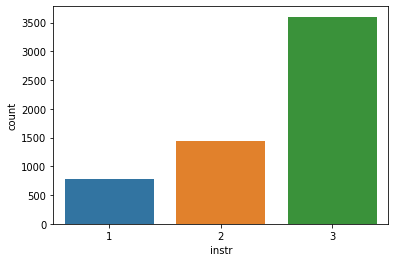

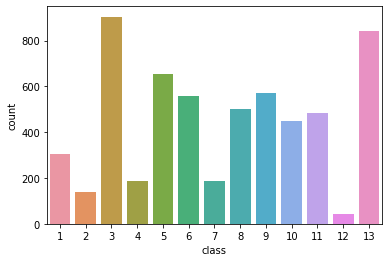

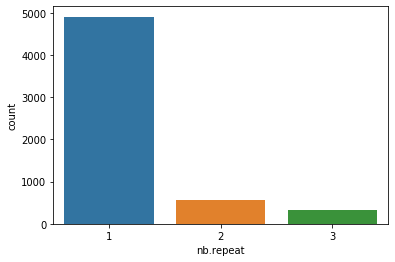

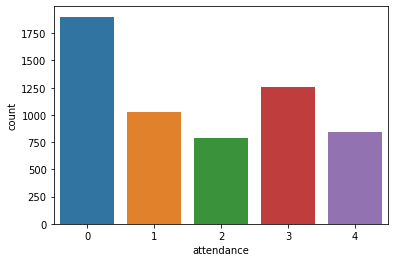

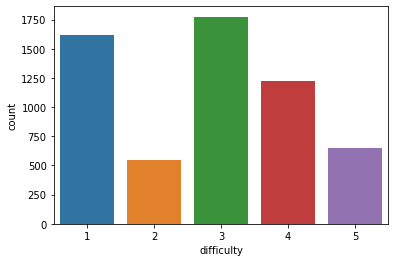

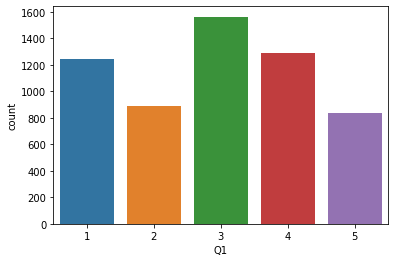

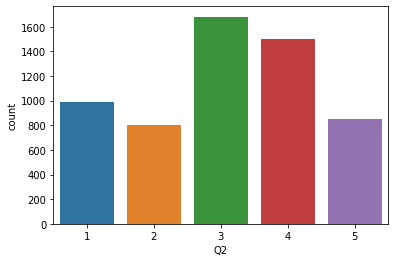

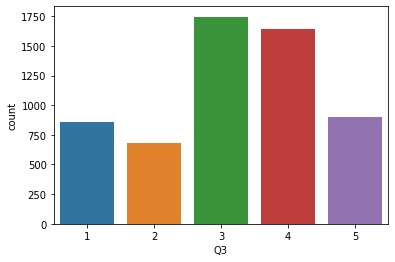

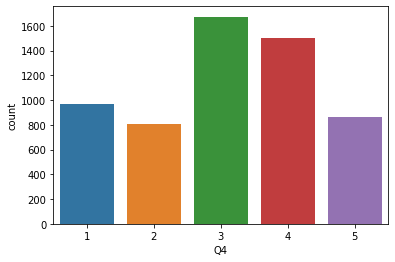

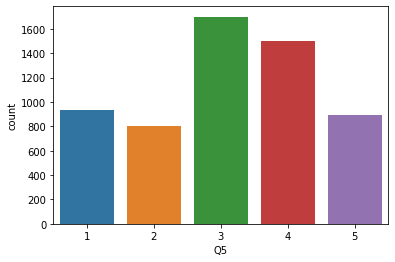

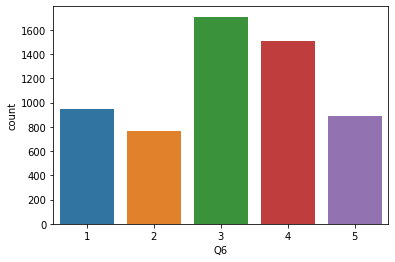

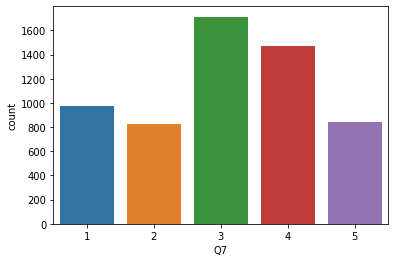

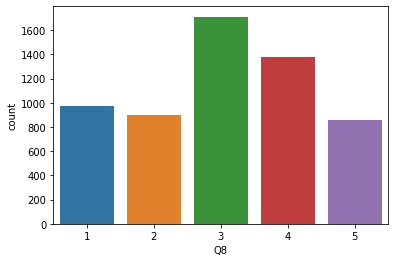

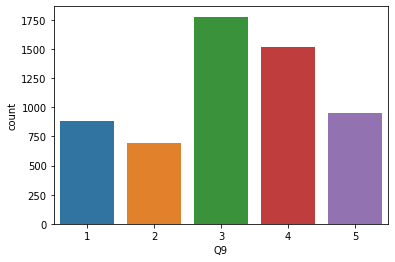

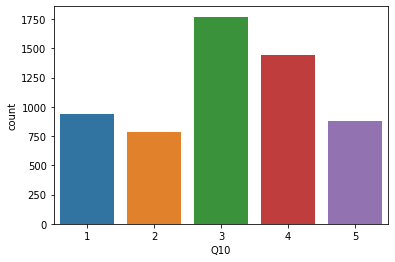

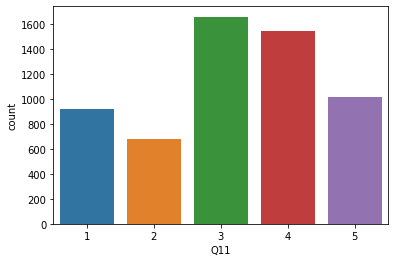

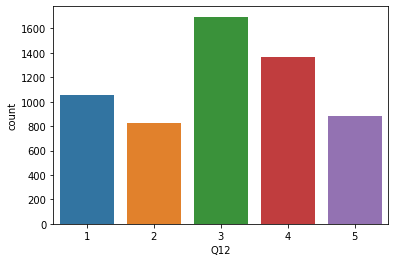

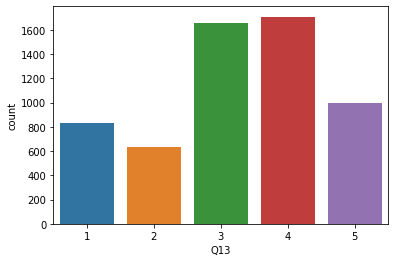

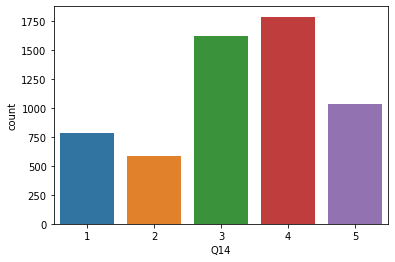

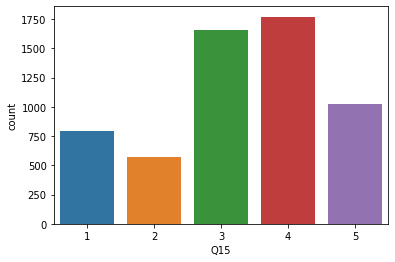

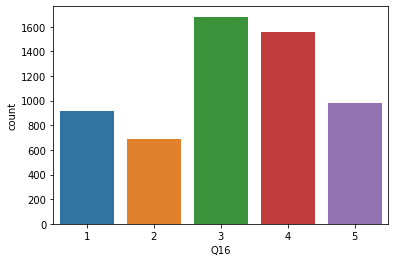

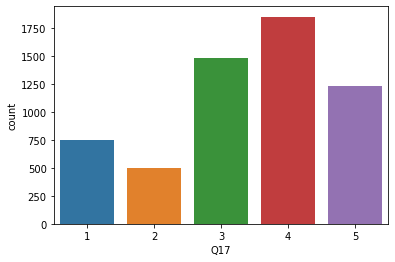

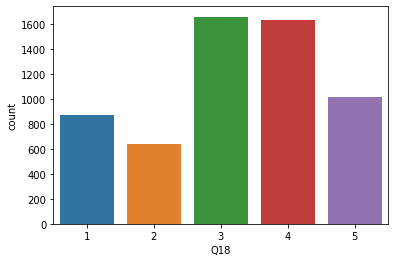

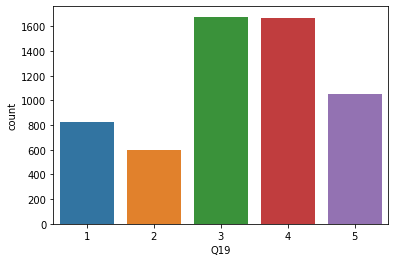

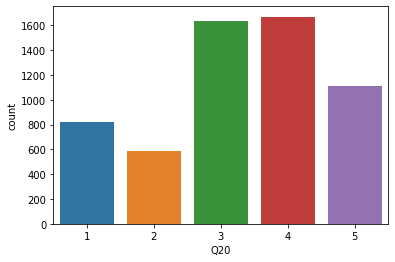

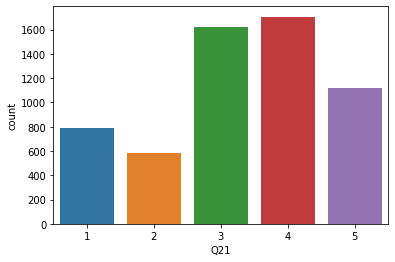

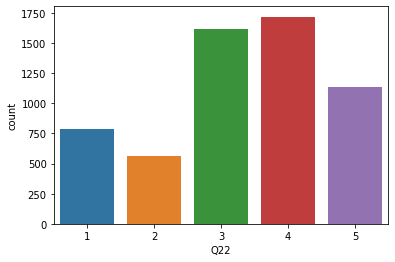

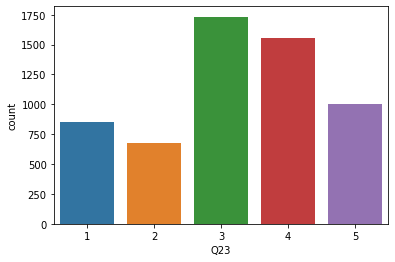

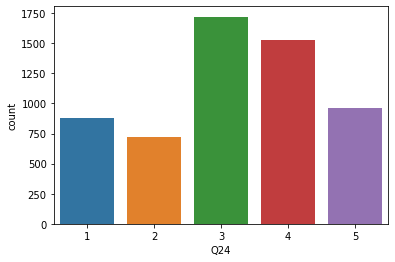

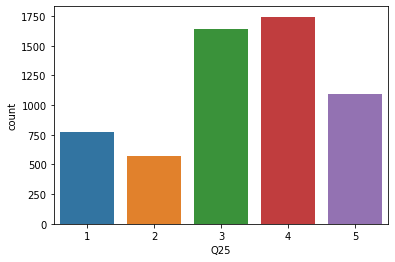

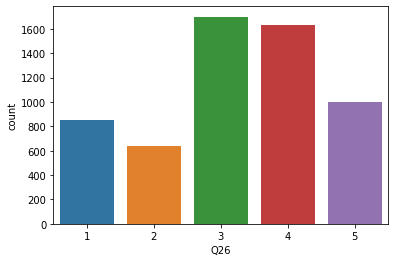

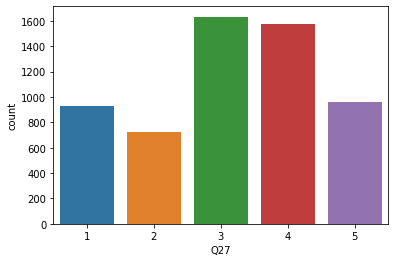

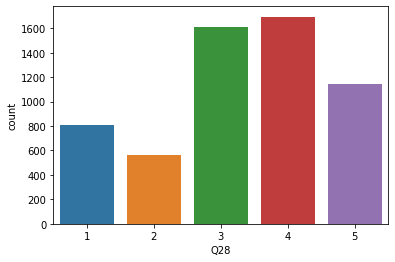

In [6]:
# Vizualising the distinct count of each feature 
for i in df.columns:
    sns.countplot(i,data=df)
    plt.show()

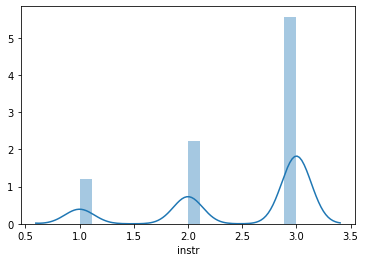

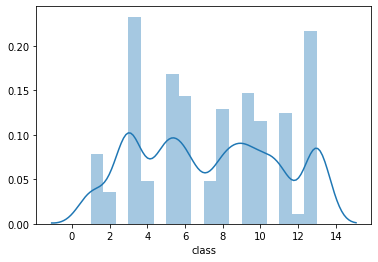

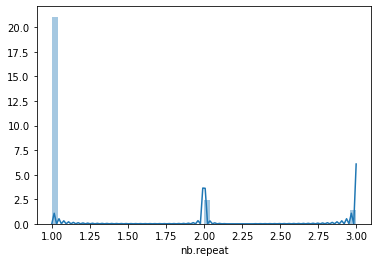

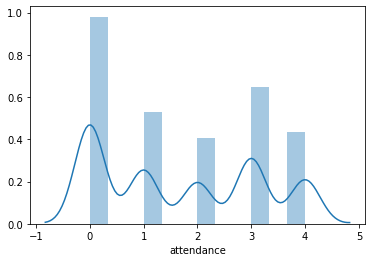

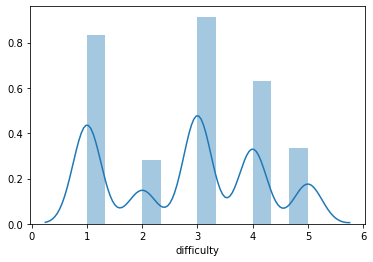

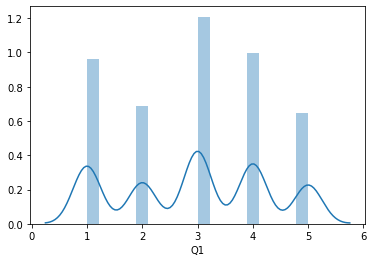

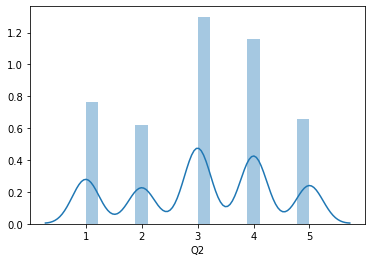

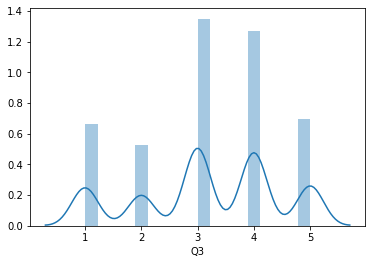

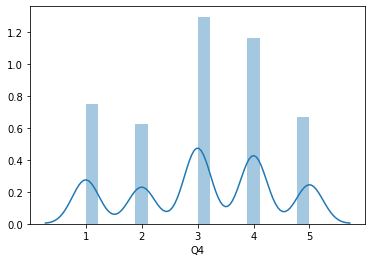

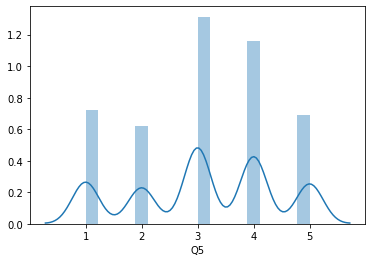

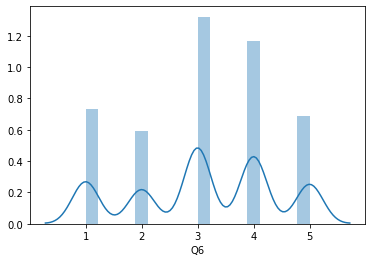

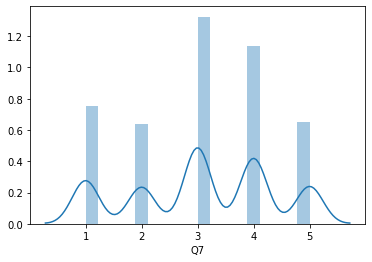

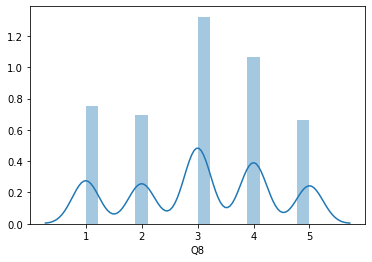

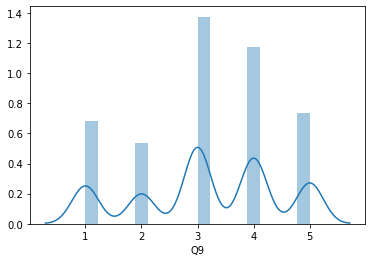

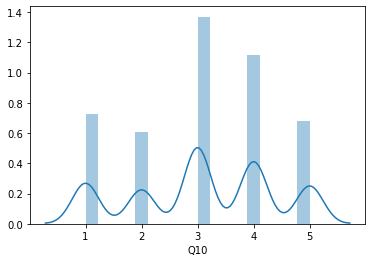

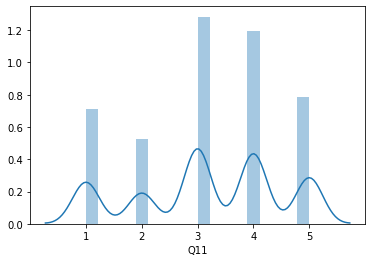

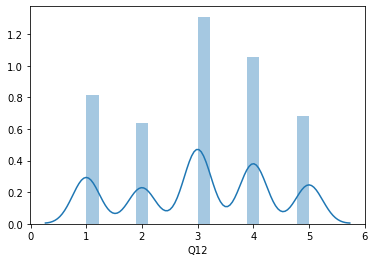

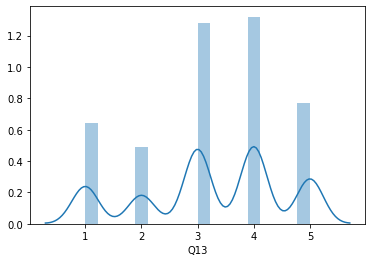

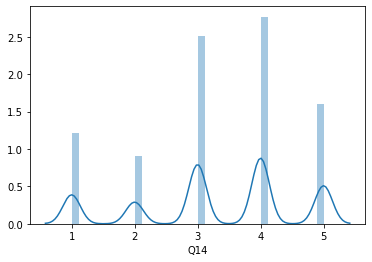

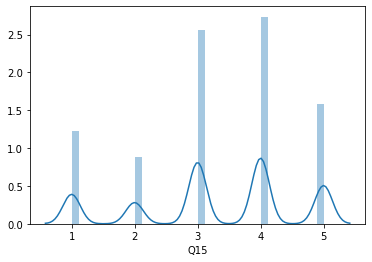

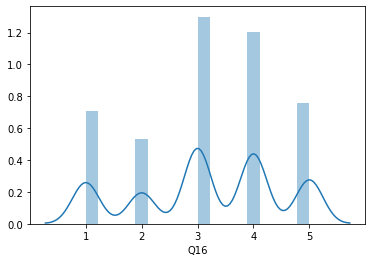

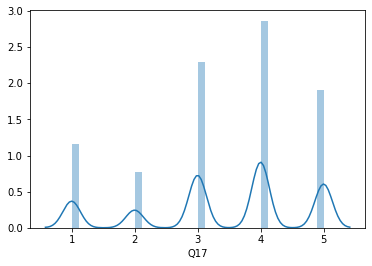

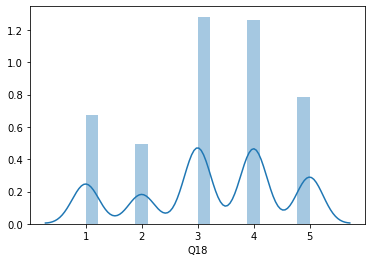

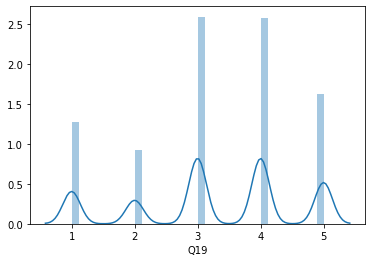

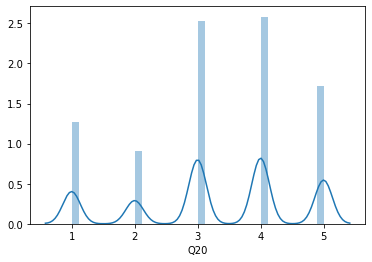

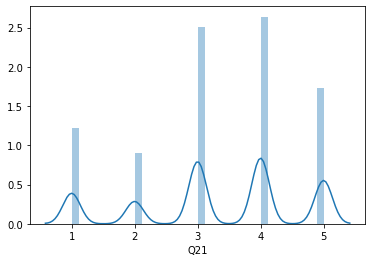

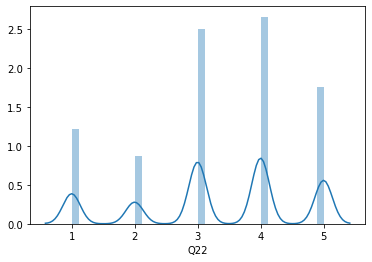

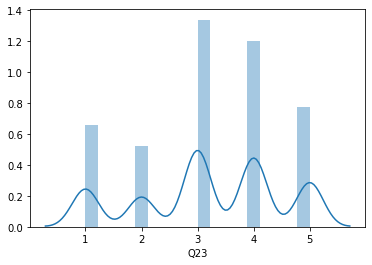

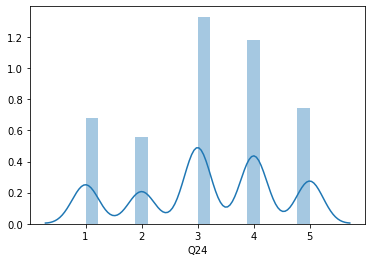

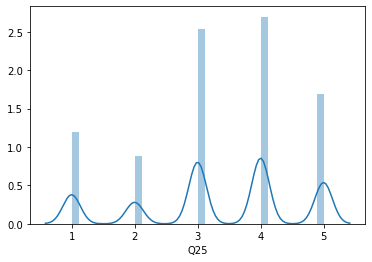

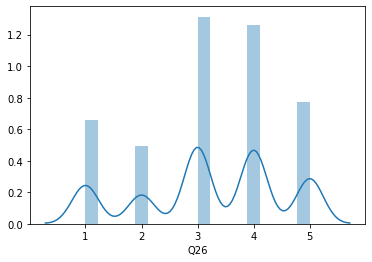

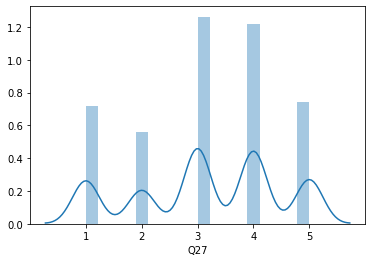

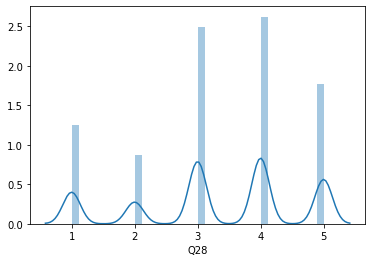

In [7]:
# Vizualizing the distribution of each independent variable, to understand the spread of data
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

From the above graphs, we can understand that data is randomly distributed. Thus we proceed with our clustering approch.

In [8]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [9]:
ques_mean = {'Q1':'mean', 'Q2':'mean', 'Q3':'mean', 'Q4':'mean', 'Q5':'mean', 'Q6':'mean', 'Q7':'mean', 'Q8':'mean',
     'Q9':'mean', 'Q10':'mean', 'Q11':'mean', 'Q12':'mean', 'Q13':'mean', 'Q14':'mean', 'Q15':'mean', 'Q16':'mean',
     'Q17':'mean', 'Q18':'mean', 'Q19':'mean', 'Q19':'mean', 'Q20':'mean', 'Q21':'mean', 'Q22':'mean', 'Q23':'mean',
     'Q24':'mean', 'Q25':'mean', 'Q26':'mean', 'Q27':'mean', 'Q28':'mean'}

In [10]:
ques = df.groupby('class').agg(ques_mean)

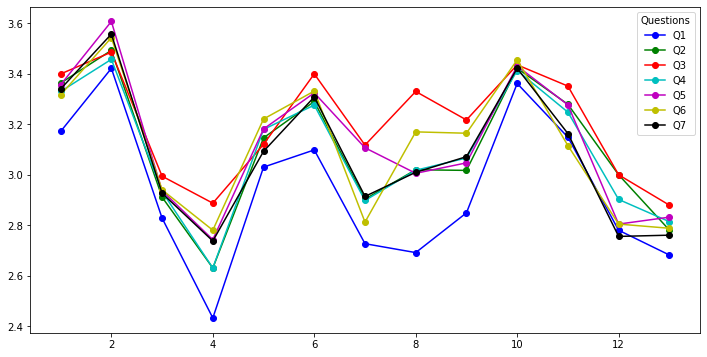

In [11]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q1, marker='o', color='b', label='Q1')
plt.plot(ques.index, ques.Q2, marker='o', color='g', label='Q2')
plt.plot(ques.index, ques.Q3, marker='o', color='r', label='Q3')
plt.plot(ques.index, ques.Q4, marker='o', color='c', label='Q4')
plt.plot(ques.index, ques.Q5, marker='o', color='m', label='Q5')
plt.plot(ques.index, ques.Q6, marker='o', color='y', label='Q6')
plt.plot(ques.index, ques.Q7, marker='o', color='k', label='Q7')
plt.legend(title='Questions')
plt.show()

From the abov graph, we can see that students enrolled in course 2, 3, 5,10 have very similar opinions.

As they have given ratings, similar ratings for the questions from 1 to 7.

We see that, these questions are about the courses content and how the course was covered. 

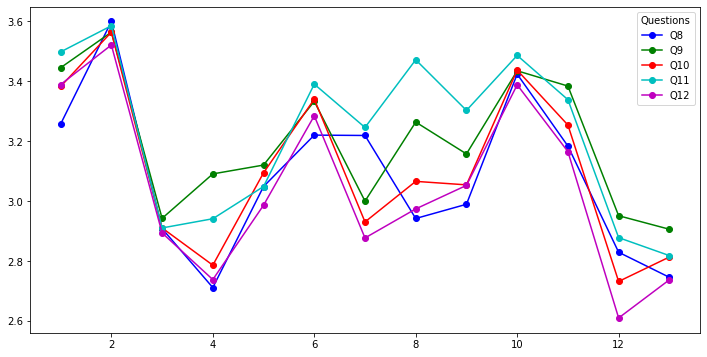

In [12]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q8, marker='o', color='b', label='Q8')
plt.plot(ques.index, ques.Q9, marker='o', color='g', label='Q9')
plt.plot(ques.index, ques.Q10, marker='o', color='r', label='Q10')
plt.plot(ques.index, ques.Q11, marker='o', color='c', label='Q11')
plt.plot(ques.index, ques.Q12, marker='o', color='m', label='Q12')
plt.legend(title='Questions')
plt.show()

The trend continues for course 2, 3 & 10, but we can see variations in course 5. for questions 8 to 12.

We see that, these questions are about how the courses helped them to gain skills & how relevent the course is, how much they enjoyed during studying it.

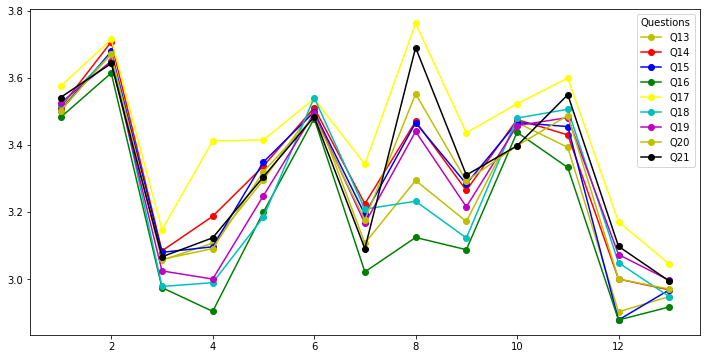

In [13]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q13, marker='o', color='y', label='Q13')
plt.plot(ques.index, ques.Q14, marker='o', color='r', label='Q14')
plt.plot(ques.index, ques.Q15, marker='o', color='b', label='Q15')
plt.plot(ques.index, ques.Q16, marker='o', color='g', label='Q16')
plt.plot(ques.index, ques.Q17, marker='o', color='yellow', label='Q17')
plt.plot(ques.index, ques.Q18, marker='o', color='c', label='Q18')
plt.plot(ques.index, ques.Q19, marker='o', color='m', label='Q19')
plt.plot(ques.index, ques.Q20, marker='o', color='y', label='Q20')
plt.plot(ques.index, ques.Q21, marker='o', color='k', label='Q21')
plt.legend(title='Questions')
plt.show()

Here we see that, course 2,6 & 10 have similar ratings, for questions 13 to 21.

These questions are about instructor's knowledge, how well he explained, and how easily students could graps.

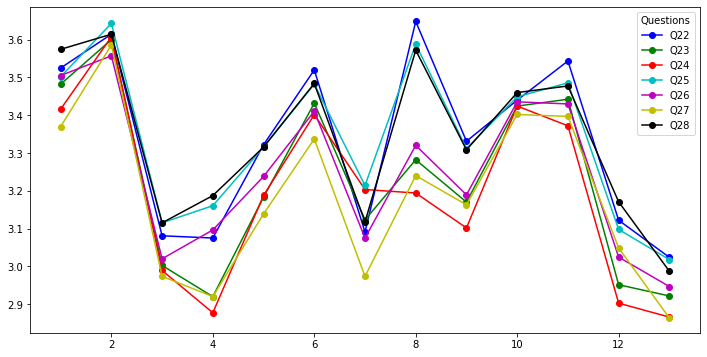

In [14]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q22, marker='o', color='b', label='Q22')
plt.plot(ques.index, ques.Q23, marker='o', color='g', label='Q23')
plt.plot(ques.index, ques.Q24, marker='o', color='r', label='Q24')
plt.plot(ques.index, ques.Q25, marker='o', color='c', label='Q25')
plt.plot(ques.index, ques.Q26, marker='o', color='m', label='Q26')
plt.plot(ques.index, ques.Q27, marker='o', color='y', label='Q27')
plt.plot(ques.index, ques.Q28, marker='o', color='k', label='Q28')
plt.legend(title='Questions')
plt.show()

Here again course 2, 3 & 10 have similar ratings, for questions 22 to 28.

These questions are about the instructor's commitment towards the class and how much he explained about the course content.

In [15]:
# Dropping the column
df1=df.drop(['instr','class','nb.repeat','attendance','difficulty'],1)
df1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
# Scaling the Data
from scipy.stats import zscore
df_scaled =df1.apply(zscore)
df_scaled.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [17]:
# Applying K-Means

from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(df_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,162960.000000
1,2,76342.930760
2,3,45249.377663
3,4,36884.896075
4,5,31843.730333
5,6,29124.137125
6,7,27655.934116
7,8,26775.668123
8,9,26133.982850


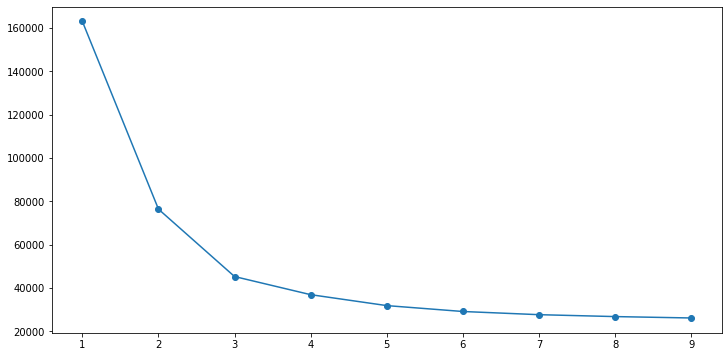

In [18]:
# ELbow Plot or Scree Plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

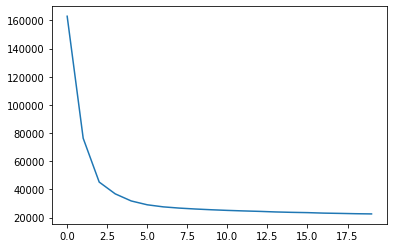

In [19]:
# sum of squared clusters, calculating inertia
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters=num_clusters, max_iter=50)
    model_clus.fit(df_scaled)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)
plt.show()

In [20]:
# Taking relevant clusters = 3
KMeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
KMeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
# calculating the centroids
centroids=KMeans.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))
centroid_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.869942,0.923108,0.888592,0.903968,0.943330,0.911358,0.934162,0.931105,0.894219,0.961428,...,0.904352,0.887557,0.879281,0.881959,0.933587,0.933666,0.880486,0.907723,0.894973,0.860808
1,-0.227017,-0.195465,-0.145937,-0.186769,-0.193285,-0.169104,-0.202737,-0.205126,-0.162166,-0.205216,...,-0.098883,-0.075039,-0.070103,-0.075183,-0.138039,-0.151338,-0.075248,-0.118897,-0.136553,-0.067183
2,-1.142231,-1.299449,-1.332102,-1.281442,-1.340352,-1.328847,-1.305520,-1.295375,-1.311088,-1.350243,...,-1.451254,-1.466650,-1.461127,-1.456214,-1.428973,-1.403526,-1.453415,-1.418860,-1.361743,-1.433214


In [22]:
# we got three labels
KMeans.labels_

array([1, 1, 0, ..., 0, 2, 2])

In [23]:
# creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(KMeans.labels_ , columns = ['labels'])
df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
df_labels.head()

,labels
0,1
1,1
2,0
3,1
4,2


In [25]:
# joining the labels to the copy of original data set
df_labeled = df1.join(df_labels)

In [26]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(5788)
df_analysis.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
5,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
9,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0


In [27]:
# Acc to clusters formed, we have 0-High, 1-Neutral, 2-Low
df_labeled['labels'].value_counts()  

1    2363
0    2229
2    1228
Name: labels, dtype: int64

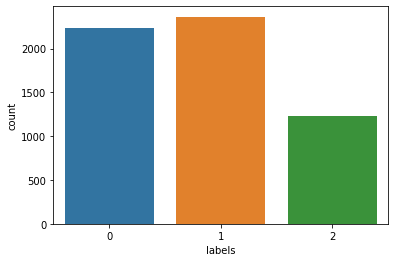

In [28]:
sns.countplot(df_labels.labels)
plt.show()

Text(0.5, 0.92, '3D plot of KMeans Clustering')

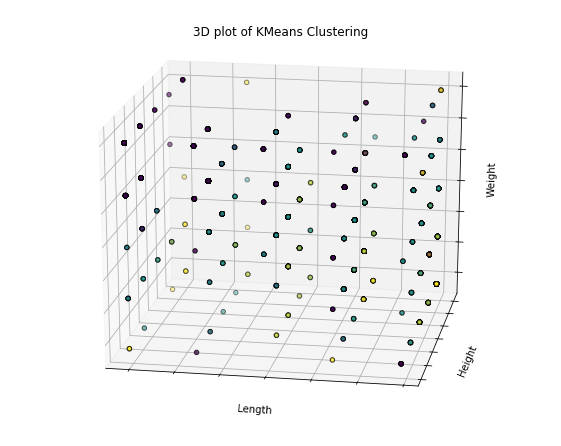

In [29]:
# 3D vissualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
KMeans.fit(df_scaled)
labels = KMeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [30]:
# Visualizing K-Means cluster

from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 3)
# training the model
clusters = kmeans2.fit_predict(df)
# Adding a label feature with the predicted class values:
df_k = df.copy(deep = True)
df_k['label'] = clusters

df_k['label'].value_counts()

2    2358
0    2229
1    1233
Name: label, dtype: int64

### Hierarchical Clustering

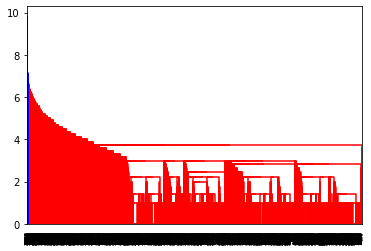

In [31]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
mergings = linkage(df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

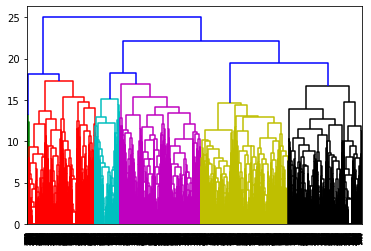

In [32]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
mergings = linkage(df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

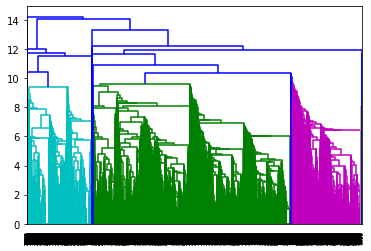

In [33]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
mergings = linkage(df, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

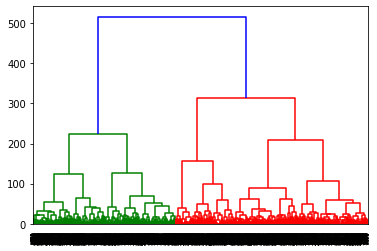

In [34]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
mergings = linkage(df, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

df_h['label'].value_counts()

0    2482
1    2315
2    1023
Name: label, dtype: int64

#### Comparing Original, K-Means and Hierarchical Clustered Classes:

In [36]:
print('K-Means Predicted Data Clusters:')
print(df_k.label.value_counts())
print('-'*30)
print('Hierarchical Predicted Data Clusters:')
print(df_h.label.value_counts())

K-Means Predicted Data Clusters:
2    2358
0    2229
1    1233
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Clusters:
0    2482
1    2315
2    1023
Name: label, dtype: int64


## Classification Analysis

In [37]:
df_new = df_scaled.join(df_labels)

In [38]:
df_new.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'labels'],
      dtype='object')

In [39]:
X = df_new.drop('labels', axis=1)
y = df_new['labels']

from sklearn. model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Random Forest

In [40]:
# Random Forest

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train,y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of random Forest - Test', accuracy_score(y_pred,y_test))

Accuracy of Random Forest - Train 0.9995090819833088
Accuracy of random Forest - Test 0.9656357388316151


### KNN

In [41]:
## KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of KNN - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of KNN - Test', accuracy_score(y_pred,y_test))

Accuracy of KNN - Train 0.9818360333824251
Accuracy of KNN - Test 0.9725085910652921


### Decision Tree

In [42]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree - Test', accuracy_score(y_pred,y_test))

Accuracy of Decision Tree - Train 1.0
Accuracy of Decision Tree - Test 0.9398625429553265


### Stacking Algorithms

In [44]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(estimators=[('rfc',rfc),('knn',knn),('dt',dt)], voting='soft', weights =[2,3,1])
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print('Accuracy of Stacked Algos. - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of Stacked Algos. - Test', accuracy_score(y_pred,y_test))

Accuracy of Stacked Algos. - Train 0.9982817869415808
Accuracy of Stacked Algos. - Test 0.9713631156930126


#### PCA & KMeans Vizualization

In [45]:
df_labeled.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [46]:
X = df_labeled.drop('labels', axis=1)
y = df_labeled['labels']

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, index=X.index, columns=X.columns)

In [47]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00017185 0.86628682 0.76751335 0.84991859 0.80489503 0.76969296
  0.79409364 0.79348286 0.73487031 0.79674904 0.71619875 0.76132748
  0.7179858  0.69594198 0.69653017 0.73706419 0.61230733 0.70580294
  0.69949012 0.68541693 0.67388539 0.67081686 0.72889513 0.73229268
  0.67223581 0.69904445 0.70976091 0.65898666]
 [0.86628682 1.00017185 0.85091195 0.87370654 0.86195069 0.83309272
  0.83908516 0.82949764 0.802824   0.85327039 0.78745856 0.80301941
  0.79693894 0.78553185 0.78721524 0.81246779 0.7170941  0.78521115
  0.78877828 0.77843277 0.76511782 0.76700376 0.8013099  0.79745116
  0.76675343 0.77853867 0.76825734 0.75264434]
 [0.76751335 0.85091195 1.00017185 0.82648423 0.84347422 0.82401298
  0.81747288 0.80564024 0.79769568 0.83028932 0.8089333  0.77693505
  0.80655022 0.81014301 0.80489679 0.79292857 0.77242392 0.79619367
  0.79978275 0.79552039 0.79152688 0.78988223 0.79988985 0.79237721
  0.79347756 0.79643333 0.76576479 0.78143281]
 [0.84991859 0.873706

In [48]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [49]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 1.69775987e-01  3.37131702e-01 -4.71473561e-01  2.79505169e-04
   1.67893399e-01  3.91976233e-01  1.06029205e-01 -3.13395268e-02
  -2.35099607e-01 -1.69890785e-01  2.78541237e-01  2.45404446e-01
   2.32094547e-02  2.21292710e-05 -1.33862225e-02  2.45687508e-02
   1.09616019e-01 -1.15019832e-01  4.48910815e-02  1.22680747e-01
  -3.67330399e-01  1.39490967e-01 -7.41688644e-02  8.34664898e-02
  -1.85049893e-02  7.48614597e-02  5.22287267e-02  8.10586190e-03]
 [ 1.85545892e-01  2.32994692e-01 -3.20261243e-01 -1.33742500e-01
   9.99340667e-02  1.24545901e-01  4.16113345e-02 -4.62513947e-02
   1.07979199e-01  1.75881304e-01  1.82439977e-01 -1.56848453e-02
  -4.68665364e-03 -5.61270483e-02 -3.08910007e-02  3.03461796e-02
  -3.54320023e-01 -1.41969964e-01  1.38131596e-02 -3.02563485e-01
   6.09166943e-01 -4.21639184e-02  7.85522228e-02 -1.55359233e-01
   3.21212857e-02 -1.80591910e-01 -6.28920090e-02 -4.56934205e-02]
 [ 1.85565714e-01  1.22188372e-01 -1.46745386e-01 -3.375

In [50]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [51]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 82.28893921  86.76364447  88.17413604  89.46292709  90.49821535
  91.4133336   92.14246846  92.7969686   93.41293697  93.92248884
  94.41587028  94.90494002  95.33016339  95.74579137  96.1536706
  96.54543197  96.92311688  97.2823681   97.62265309  97.95395402
  98.25611699  98.55720839  98.84454941  99.12086225  99.37363996
  99.61550298  99.81477487 100.        ]


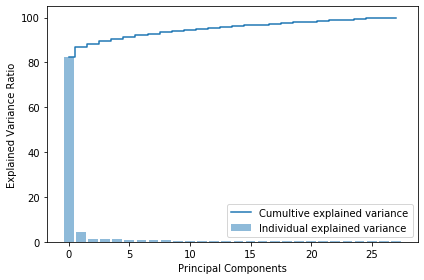

In [52]:
plt.figure(figsize=(6,4))
plt.bar(range(28), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(28), cum_var_exp, where = 'mid', label = 'Cumultive explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Plotting the principal components 
We'll plot original features on the first 2 principal components as axes

In [56]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],
                       'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.179011,0.351480,Q1
1,-0.186865,0.232803,Q2
2,-0.182624,0.120687,Q3
3,-0.184139,0.241765,Q4
4,-0.189617,0.211085,Q5


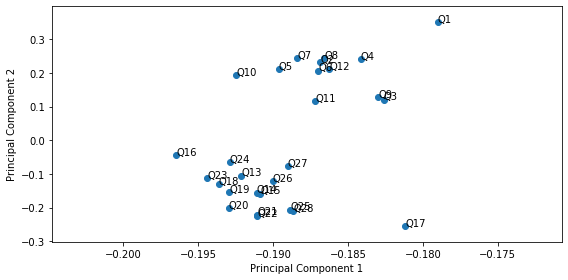

In [57]:
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

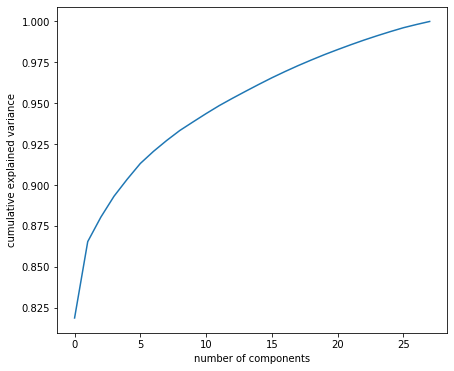

In [58]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (7,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [59]:
#lets do pca for feature dimensional reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df_pca=pca.fit_transform(X_std )

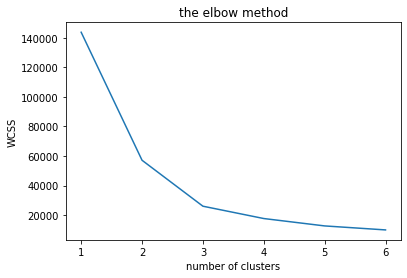

In [60]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(df_pca)

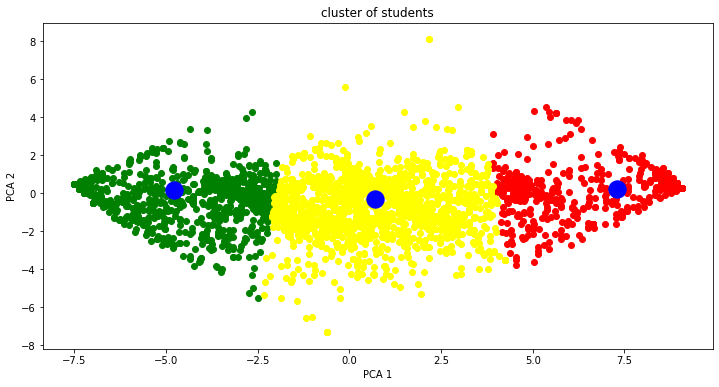

In [62]:
# Vizualizing clusters and their centroids
plt.figure(figsize = (12,6))
plt.scatter(df_pca[y_kmeans==0,0],df_pca[y_kmeans==0,1],c='red')
plt.scatter(df_pca[y_kmeans==1,0],df_pca[y_kmeans==1,1],c='green')
plt.scatter(df_pca[y_kmeans==2,0],df_pca[y_kmeans==2,1],c='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue')
plt.title('cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [63]:
#Using incremental PCA for efficiency - saves time on larger datasets, on train set
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [64]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(4656, 6)

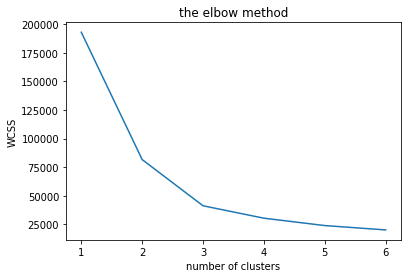

In [65]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_train_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(df_train_pca)

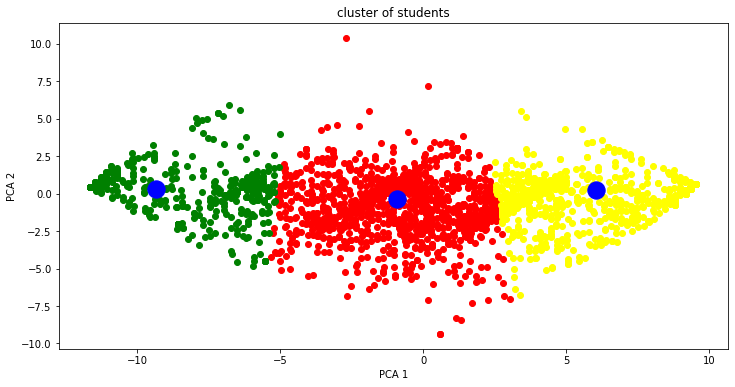

In [67]:
plt.figure(figsize = (12,6))
plt.scatter(df_train_pca[y_kmeans==0,0],df_train_pca[y_kmeans==0,1],c='red')
plt.scatter(df_train_pca[y_kmeans==1,0],df_train_pca[y_kmeans==1,1],c='green')
plt.scatter(df_train_pca[y_kmeans==2,0],df_train_pca[y_kmeans==2,1],c='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue')
plt.title('cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Thus, we see that there are 3 types of average rakings given by the students.

Management can take actions regarding the low rating and improve the course content or the instructors.